In [1]:
import pandas as pd
import numpy as np

<h3> Loading the data </h3>

In this module, we practice with the obesity data. Each row in the data represents a subject. The data has 16 attributes on different measurements of the subjects such as gender, age, height, other test measurements, and the obesity level. The target is obesity level of each subject which is as follows

- ObesityLevel = 1 : Insufficient_Weight
- ObesityLevel = 2 : Normal_Weight
- ObesityLevel = 3 : Overweight_Level_I
- ObesityLevel = 4 : Overweight_Level_II
- ObesityLevel = 5 : Obesity_Type_I
- ObesityLevel = 6 : Obesity_Type_II
- ObesityLevel = 7 : Obesity_Type_III

In [2]:
data = pd.read_csv('obesity.csv')
data

,Gender,Age,Height,Weight,FamilyHistory,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,ObesityLevel
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,2
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,2
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,2
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,3
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,7
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,7
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,7
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,7


In [3]:
data.dtypes

Gender            object
Age              float64
Height           float64
Weight           float64
FamilyHistory     object
FAVC              object
FCVC             float64
NCP              float64
CAEC              object
SMOKE             object
CH2O             float64
SCC               object
FAF              float64
TUE              float64
CALC              object
MTRANS            object
ObesityLevel       int64
dtype: object

In [4]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in split.split(data):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

And create different variables for input data and target data

In [5]:
trainX = train_set.drop('ObesityLevel',axis=1)
trainY = train_set['ObesityLevel']
testX = test_set.drop('ObesityLevel',axis=1)
testY = test_set['ObesityLevel']

trainX.shape, testX.shape, trainY.shape, testY.shape

((1583, 16), (528, 16), (1583,), (528,))

Some descriptive statistics

In [5]:
trainX.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000
mean,24.453721,1.701837,86.569501,2.424656,2.684986,2.007479,1.009436,0.653887
std,6.531185,0.093194,26.052413,0.533616,0.780362,0.613589,0.840905,0.604848
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.986482,1.630000,66.000000,2.000000,2.656492,1.569332,0.145318,0.000000
50%,22.789402,1.701284,82.853749,2.392665,3.000000,2.000000,1.000000,0.627886
75%,26.000000,1.767407,106.500679,3.000000,3.000000,2.473548,1.647207,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


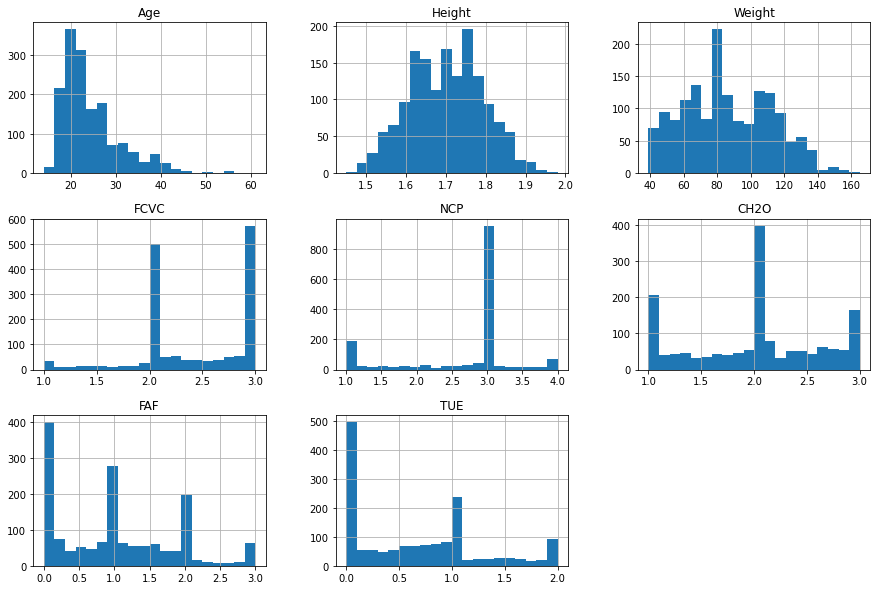

In [6]:
from matplotlib import pyplot as plt

trainX.hist(bins=20, figsize=(15,10))
plt.show()

In [12]:
trainY.describe()

count    1583.000000
mean        4.118130
std         1.982686
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max         7.000000
Name: ObesityLevel, dtype: float64

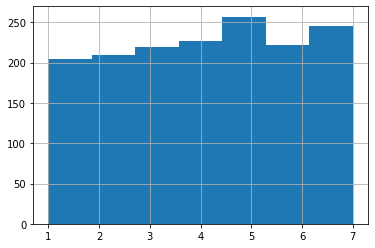

In [16]:
trainY.hist(bins=7)
plt.show()

We use the standard pipeline as developed previously 

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

num_cols = trainX.columns[(trainX.dtypes==np.int64) | (trainX.dtypes==np.float64)]

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

cat_cols = trainX.columns[trainX.dtypes==object]

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant',fill_value='missing')),
    ('encode', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, num_cols),
    ('class', cat_pipeline, cat_cols)
])

In [7]:
trainX_prc = full_pipeline.fit_transform(trainX)
traindata = np.concatenate([trainY.values.reshape(-1,1),trainX_prc],axis=1)
pd.DataFrame(traindata).to_csv('train.csv', index=False, header=False)


testX_prc = full_pipeline.transform(testX)
testdata = np.array(testX_prc)

<h3>Linear Regression</h3>

This version of the linear regression model does not have regularization

In [25]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(trainX_prc,trainY)

LinearRegression()

The most common evaluation measurement for regression problem is Mean Squared Error - MSE

In [28]:
from sklearn.metrics import mean_squared_error

#get the prediction
trainY_pred = linear_reg.predict(trainX_prc)
testY_pred = linear_reg.predict(testX_prc)

#get the MSE
train_mse_lr = mean_squared_error(trainY, trainY_pred)
test_mse_lr = mean_squared_error(testY, testY_pred)
print('training MSE:', train_mse_lr)
print('testing MSE:', test_mse_lr)

training MSE: 0.1830048989342583
testing MSE: 0.1874595164590405


And we can obtain the R2

In [29]:
from sklearn.metrics import r2_score

train_r2_lr = r2_score(trainY, trainY_pred)
test_r2_lr = r2_score(testY, testY_pred)
print('training MSE:', train_r2_lr)
print('testing MSE:', test_r2_lr)

training MSE: 0.9534167931985943
testing MSE: 0.9527608118624992


R2 score is always less than 1, and it is interpreted as the percentage of variation in the data that our model can explain. In cases with very bad-fit models, R2 can get to negative values.

In this case, this linear regression model can explain 95% variation in the data

<h4>Cross-Validation Measurements</h4>

We've been fitting and testing the linear regression model on the same training data. A better way is to use cross_val_score() as in classification

In [31]:
from sklearn.model_selection import cross_val_score

mse_lr_cv = - cross_val_score(linear_reg, trainX_prc, trainY, cv=5, scoring='neg_mean_squared_error')
r2_lr_cv = cross_val_score(linear_reg, trainX_prc, trainY, cv=5, scoring='r2')

print('MSE: ', mse_lr_cv.mean())
print('R2: ', r2_lr_cv.mean())

MSE:  0.18997089657929456
R2:  0.9513653291539574


<h3> Support Vector Regressor </h3>

SVM can be modified to work on regression problem. We call this model Support Vector Regressor (SVR). In SKLearn, fitting SVR is pretty much identical to fitting SVC (except for target must be continuous). All hyperparameters of SVR are the same as SVC.

In the below example, we use the auto-mpg data - predicting miles-per-gallon of cars using their other features

First, import and preprocessing data:

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()

param_grid = [{
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel' : ['rbf'],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}]

grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='r2')

The finetuned model (note that score is now R2 since we are doing regression):

In [33]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9777428852898142


And the testing performance 

In [34]:
best_svr = grid_search.best_estimator_
best_svr.score(testX_prc, testY)

0.9758521084858467

<h3>Decision Tree Regressor</h3>

In [35]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

param_grid = [{
    'max_depth': [3,4,5,6],
    'max_features' : [5, 7, 9],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [3, 4, 5, 6], 'max_features': [5, 7, 9],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40]}],
             return_train_score=True, scoring='r2')

In [36]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 6, 'max_features': 9, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.9030946632161196


In [37]:
best_dt = grid_search.best_estimator_
best_dt.score(testX_prc, testY)

0.832628277021818

<h3>Random Forest Regressor</h3>

In [38]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

param_grid = [{
    'n_estimators' : [5, 10, 20, 50],
    'max_depth': [3,4,5],
    'max_features' : [5, 7, 9],
    'min_samples_split' : [2, 10, 20, 30, 40],
    'min_samples_leaf' : [1, 10, 20, 30, 40]
}]

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [3, 4, 5], 'max_features': [5, 7, 9],
                          'min_samples_leaf': [1, 10, 20, 30, 40],
                          'min_samples_split': [2, 10, 20, 30, 40],
                          'n_estimators': [5, 10, 20, 50]}],
             return_train_score=True, scoring='r2')

In [39]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'max_features': 9, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 50}
0.9327970656177857


In [40]:
best_dt = grid_search.best_estimator_
best_dt.score(testX_prc, testY)

0.9173895613972686

<h3>Neural Network Regressor</h3>

In [41]:
from sklearn.neural_network import MLPRegressor

n_features = trainX_prc.shape[1] #get the number of input features
mlp = MLPRegressor(hidden_layer_sizes=[n_features,n_features,n_features], max_iter=1000)

mlp.fit(trainX_prc, trainY)
print(mlp.score(trainX_prc, trainY))
print(mlp.score(testX_prc, testY))

0.9955993500007082
0.9797580198281762


It seems like the model is overfitting.

Now let's finetune the NN. I'm just gonna train a few architectures.

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'hidden_layer_sizes' : [[n_features,n_features],                       #two hidden layer with n_features neurons
                            [n_features,n_features,n_features],            #three hidden layer with n_features neurons 
                            [n_features//2,n_features//2],                 #two hidden layer with n_features/2 neurons
                            [n_features//2,n_features//2,n_features//2],   #three hidden layer with n_features/2 neurons
                            [n_features*2,n_features*2],                   #two hidden layer with n_features*2 neurons
                            [n_features*2,n_features*2,n_features*2]],     #three hidden layer with n_features*2 neurons
    'alpha' : [0.001, 0.01, 0.1, 1, 10]                                    #regularization terms
}]

mlp = MLPRegressor(max_iter=1000)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', return_train_score=True)

grid_search.fit(trainX_prc,trainY)

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1000),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10],
                          'hidden_layer_sizes': [[31, 31], [31, 31, 31],
                                                 [15, 15], [15, 15, 15],
                                                 [62, 62], [62, 62, 62]]}],
             return_train_score=True, scoring='r2')

Best training model:

In [46]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1, 'hidden_layer_sizes': [31, 31, 31]}
0.9855491104798759


In [47]:
best_dt = grid_search.best_estimator_
best_dt.score(testX_prc, testY)

0.9835694509988757

<h3>XGBoost</h3>

In [8]:
import sagemaker
import boto3

import numpy as np                                # For performing matrix operations and numerical processing
from time import gmtime, strftime
import os

region = boto3.Session().region_name
smclient = boto3.Session().client('sagemaker')

from sagemaker import get_execution_role

role = get_execution_role()
print(role)

sess = sagemaker.Session()
bucket = sess.default_bucket()                    # Set a default S3 bucket
prefix = 'DEMO-automatic-model-tuning-xgboost-dm'

arn:aws:iam::055003053546:role/service-role/AmazonSageMaker-ExecutionRole-20220213T111622


In [9]:
from sklearn.model_selection import train_test_split

#further split training data to training and validation
trainX_prc, validX_prc, trainY, validY = train_test_split(trainX_prc,trainY,test_size=0.3)

In [10]:
traindata = np.concatenate([trainY.values.reshape(-1,1),trainX_prc],axis=1)
validdata = np.concatenate([validY.values.reshape(-1,1),validX_prc],axis=1)
pd.DataFrame(traindata).to_csv('train.csv', index=False, header=False)
pd.DataFrame(validdata).to_csv('validation.csv', index=False, header=False)

In [11]:
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')

<h4>Launch a Model Tuning Job</h4>

<h5>Define Hyperparamter Grid</h5>

In [24]:
tuning_job_config = {
    "ParameterRanges": {
      "CategoricalParameterRanges": [],
      "ContinuousParameterRanges": [
        {
          "MaxValue": "1",
          "MinValue": "0",
          "Name": "eta"
        },
        {
          "MaxValue": "2",
          "MinValue": "0",
          "Name": "alpha"
        },
        {
          "MaxValue": "10",
          "MinValue": "1",
          "Name": "min_child_weight"
        },
        {
          "MaxValue": "0.9",
          "MinValue": "0.3",
          "Name": "subsample"
        }
      ],
      "IntegerParameterRanges": [
        {
          "MaxValue": "10",
          "MinValue": "1",
          "Name": "max_depth"
        }
      ]
    },
    "ResourceLimits": {
      "MaxNumberOfTrainingJobs": 20,
      "MaxParallelTrainingJobs": 3
    },
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {
      "MetricName": "validation:mse",
      "Type": "Minimize"
    }
  }

<h5>Define Training Job</h5>

In [25]:
from sagemaker.amazon.amazon_estimator import get_image_uri
training_image = get_image_uri(region, 'xgboost', repo_version='1.0-1')

s3_input_train = 's3://{}/{}/train'.format(bucket, prefix)
s3_input_validation ='s3://{}/{}/validation/'.format(bucket, prefix)

training_job_definition = {
    "AlgorithmSpecification": {
      "TrainingImage": training_image,
      "TrainingInputMode": "File"
    },
    "InputDataConfig": [
      {
        "ChannelName": "train",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_input_train
          }
        }
      },
      {
        "ChannelName": "validation",
        "CompressionType": "None",
        "ContentType": "csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_input_validation
          }
        }
      }
    ],
    "OutputDataConfig": {
      "S3OutputPath": "s3://{}/{}/output".format(bucket,prefix)
    },
    "ResourceConfig": {
      "InstanceCount": 1,
      "InstanceType": "ml.c4.2xlarge",
      "VolumeSizeInGB": 10
    },
    "RoleArn": role,
    "StaticHyperParameters": {
      "eval_metric": "mse",
      "num_round": "100",
      "objective": "reg:squarederror",
      "rate_drop": "0.3",
      "tweedie_variance_power": "1.4"
    },
    "StoppingCondition": {
      "MaxRuntimeInSeconds": 43200
    }
}

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


<h5>Name and Launch Tuning Job</h5>

In [26]:
tuning_job_name = "RegTuningJob"
smclient.create_hyper_parameter_tuning_job(HyperParameterTuningJobName = tuning_job_name,
                                           HyperParameterTuningJobConfig = tuning_job_config,
                                           TrainingJobDefinition = training_job_definition)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:055003053546:hyper-parameter-tuning-job/regtuningjob',
 'ResponseMetadata': {'RequestId': '5bd3e7e7-42eb-44dd-a0ad-3699197aa301',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '5bd3e7e7-42eb-44dd-a0ad-3699197aa301',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '113',
   'date': 'Mon, 28 Feb 2022 18:00:36 GMT'},
  'RetryAttempts': 0}}

Monitoring and deploy the model is identical as before

<h4>Import the Best Model to Make Predictions</h4>

In [31]:
from sagemaker.serializers import CSVSerializer
from sagemaker.predictor import Predictor

best_xgboost = Predictor('xgboost-ob-endpoint')      #the endpoint name you created goes here
best_xgboost.serializer = CSVSerializer()
predictions = best_xgboost.predict(testX_prc).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

print('Testing MSE:',mean_squared_error(testY.values, predictions_array))
print('Testing R2:',r2_score(testY.values, predictions_array))

Testing MSE: 0.0567195278976026
Testing R2: 0.9857068635402646


<h4>Cleaning up</h4>

In [35]:
best_xgboost.delete_endpoint(delete_endpoint_config=True)

<h3>SageMaker Linear Learner</h3>

<h4>Launch a Model Tuning Job</h4>

<h5>Define Hyperparamter Grid</h5>

In [58]:
tuning_job_config = {
    "ParameterRanges": {
      "CategoricalParameterRanges": [],
      "ContinuousParameterRanges": [
        {
          "MaxValue": "1",
          "MinValue": "0",
          "Name": "l1"
        },
        {
          "MaxValue": "1",
          "MinValue": "0",
          "Name": "wd"
        },
        {
          "MaxValue": "1",
          "MinValue": "0.001",
          "Name": "learning_rate"
        },
      ],
      "IntegerParameterRanges": [
        {
          "MaxValue": "500",
          "MinValue": "100",
          "Name": "mini_batch_size"
        }
      ]
    },
    "ResourceLimits": {
      "MaxNumberOfTrainingJobs": 20,
      "MaxParallelTrainingJobs": 3
    },
    "Strategy": "Bayesian",
    "HyperParameterTuningJobObjective": {
      "MetricName": "validation:objective_loss",
      "Type": "Minimize"
    }
  }

<h5>Define Training Job</h5>

In [59]:
from sagemaker.amazon.amazon_estimator import get_image_uri
training_image = get_image_uri(region, 'linear-learner', repo_version='1.0-1')

s3_input_train = 's3://{}/{}/train'.format(bucket, prefix)
s3_input_validation ='s3://{}/{}/validation/'.format(bucket, prefix)

training_job_definition = {
    "AlgorithmSpecification": {
      "TrainingImage": training_image,
      "TrainingInputMode": "File"
    },
    "InputDataConfig": [
      {
        "ChannelName": "train",
        "CompressionType": "None",
        "ContentType": "text/csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_input_train
          }
        }
      },
      {
        "ChannelName": "validation",
        "CompressionType": "None",
        "ContentType": "text/csv",
        "DataSource": {
          "S3DataSource": {
            "S3DataDistributionType": "FullyReplicated",
            "S3DataType": "S3Prefix",
            "S3Uri": s3_input_validation
          }
        }
      }
    ],
    "OutputDataConfig": {
      "S3OutputPath": "s3://{}/{}/output".format(bucket,prefix)
    },
    "ResourceConfig": {
      "InstanceCount": 1,
      "InstanceType": "ml.c4.2xlarge",
      "VolumeSizeInGB": 10
    },
    "RoleArn": role,
    "StaticHyperParameters": {
      "predictor_type": "regressor",
    },
    "StoppingCondition": {
      "MaxRuntimeInSeconds": 3600
    }
}

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.0-1.


<h5>Name and Launch Tuning Job</h5>

In [60]:
tuning_job_name = "RegTuningJob5"
smclient.create_hyper_parameter_tuning_job(HyperParameterTuningJobName = tuning_job_name,
                                           HyperParameterTuningJobConfig = tuning_job_config,
                                           TrainingJobDefinition = training_job_definition)

{'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:055003053546:hyper-parameter-tuning-job/regtuningjob5',
 'ResponseMetadata': {'RequestId': 'a1070e67-ebeb-489f-a409-cfeb5ac326c7',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'a1070e67-ebeb-489f-a409-cfeb5ac326c7',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '114',
   'date': 'Mon, 28 Feb 2022 19:54:20 GMT'},
  'RetryAttempts': 0}}

Monitoring and deploy the model is identical as before

<h4>Import the Best Model to Make Predictions</h4>

In [62]:
from sagemaker.serializers import CSVSerializer
from sagemaker.predictor import Predictor

best_ll = Predictor('linear-learner-ob-endpoint')      #the endpoint name you created goes here
best_ll.serializer = CSVSerializer()
predictions = best_ll.predict(testX_prc).decode('utf-8') # predict!
predictions_array = np.fromstring(predictions[1:], sep=',') # and turn the prediction into an array

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.


In [80]:
import json

ll_test_pred = json.loads(predictions)
ll_test_pred = np.array([yh['score'] for yh in ll_test_pred['predictions']])

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

print('Testing MSE:',mean_squared_error(testY.values, ll_test_pred))
print('Testing R2:',r2_score(testY.values, ll_test_pred))

Testing MSE: 0.25664156617528083
Testing R2: 0.9353271604586374


In [84]:
best_ll.delete_endpoint(delete_endpoint_config=True)
bucket_to_delete = boto3.resource('s3').Bucket(bucket)
bucket_to_delete.objects.all().delete()

[{'ResponseMetadata': {'RequestId': 'KPER53JXSC87VP4V',
   'HostId': 'Y0rsUIzMYBWqrxRKIaWq7V1ZaHfInwAGtMykpkd6s/07hlXcW0Tk9Kds35csa7KEdIOO4UpfJLo=',
   'HTTPStatusCode': 200,
   'HTTPHeaders': {'x-amz-id-2': 'Y0rsUIzMYBWqrxRKIaWq7V1ZaHfInwAGtMykpkd6s/07hlXcW0Tk9Kds35csa7KEdIOO4UpfJLo=',
    'x-amz-request-id': 'KPER53JXSC87VP4V',
    'date': 'Mon, 28 Feb 2022 20:31:06 GMT',
    'content-type': 'application/xml',
    'transfer-encoding': 'chunked',
    'server': 'AmazonS3',
    'connection': 'close'},
   'RetryAttempts': 0},
  'Deleted': [{'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/RegTuningJob-006-ab89d125/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/RegTuningJob-012-1c56f40e/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/RegTuningJob-007-4331dfea/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-model-tuning-xgboost-dm/output/RegTuningJob-013-d85fce01/output/model.tar.gz'},
   {'Key': 'DEMO-automatic-mode